# Importe de bibliotecas

In [ ]:
import numpy as np
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install requests

# RNF1: Acurácia

Essa simulação tem o propósito de mostrar a atual situação e resultados em realação a taxa de acerto do modelo de classificação ou seja, á precição do modelo em si, assim podemos ter uma visualização mais clara do que pode estar acontecento e como esses resultados prejudicam o funcionamento esperado do sistema.

## Atual

In [ ]:
# Os estados possíveis
estados = ["Certo", "Errado"]

# Possíveis sequências de eventos
transicoes = [["CC", "CE"], ["EC", "EE"]]

# Matriz de transição (probabilidades de transição)
matriz_transicao = [[0.65, 0.35],  # Probabilidades de transição de Funcionando (CC, CE)
                    [0.65, 0.35]]  # Probabilidades de transição de Parado (EC, EE)

In [ ]:
# Função para prever o estado futuro do sistema
def prever_estado_futuro(dias):

    # Escolhe o estado inicial
    estado_atual = "Certo"
    print("Estado inicial: " + estado_atual)

    # Lista para armazenar a sequência de estados
    lista_estados = [estado_atual]


    for _ in range(dias):
        if estado_atual == "Certo":
            transicao = np.random.choice(transicoes[0], replace=True, p=matriz_transicao[0])
            if transicao == "CC":
                estado_atual = "Certo"
                lista_estados.append("Certo")
            else:

                estado_atual = "Errado"
                lista_estados.append("Errado")
        else:  # Estado atual é "Parado"
            transicao = np.random.choice(transicoes[1], replace=True, p=matriz_transicao[1])
            if transicao == "EE":

                estado_atual = "Errado"
                lista_estados.append("Errado")
            else:

                estado_atual = "Certo"
                lista_estados.append("Certo")


    count_certo = 0
    count_errado = 0

    for x in lista_estados:
      if(x == "Certo"):
        count_certo += 1
      else:
        count_errado += 1

    porcentagem_de_acerto = str((count_certo/dias)*100)
    porcentagem_de_errado = str((count_errado/dias)*100)


    print("Quantidade de classificações corretas: " + porcentagem_de_acerto + "%")
    print("Quantidade de classificações erradas: " + porcentagem_de_errado + "%")

    return float(porcentagem_de_acerto), float(porcentagem_de_errado)





In [ ]:
# Previsão do estado futuro para 100 dias
prever_estado_futuro(100)

Estado inicial: Certo
Quantidade de classificações corretas: 61.0%
Quantidade de classificações erradas: 40.0%


(61.0, 40.0)

In [ ]:
# Número de repetições (para obter estatísticas)
num_repeticoes = 10
dias_por_teste = 365

# Armazene os resultados em listas
resultados_certo = []
resultados_errado = []

for _ in range(num_repeticoes):
    # Execute a função prever_estado_futuro
    acerto, erro = prever_estado_futuro(dias_por_teste)
    resultados_certo.append(acerto)
    resultados_errado.append(erro)

Estado inicial: Certo
Quantidade de classificações corretas: 61.09589041095891%
Quantidade de classificações erradas: 39.178082191780824%
Estado inicial: Certo
Quantidade de classificações corretas: 61.369863013698634%
Quantidade de classificações erradas: 38.9041095890411%
Estado inicial: Certo
Quantidade de classificações corretas: 65.75342465753424%
Quantidade de classificações erradas: 34.52054794520548%
Estado inicial: Certo
Quantidade de classificações corretas: 66.3013698630137%
Quantidade de classificações erradas: 33.97260273972603%
Estado inicial: Certo
Quantidade de classificações corretas: 67.94520547945206%
Quantidade de classificações erradas: 32.32876712328767%
Estado inicial: Certo
Quantidade de classificações corretas: 63.561643835616444%
Quantidade de classificações erradas: 36.71232876712329%
Estado inicial: Certo
Quantidade de classificações corretas: 65.20547945205479%
Quantidade de classificações erradas: 35.06849315068493%
Estado inicial: Certo
Quantidade de clas

### Gráfico de linha

O gráfico de linha é uma ferramenta essencial quando estamos simulando o comportamento de um modelo de classificação. Ele nos permite visualizar a evolução das porcentagens de acerto e erro ao longo das repetições. Ao traçar essas linhas, podemos identificar tendências e padrões que se desenvolvem ao longo do tempo.  O gráfico de linha é particularmente útil para acompanhamento a longo prazo e para identificar mudanças nas tendências de acertos e erros.

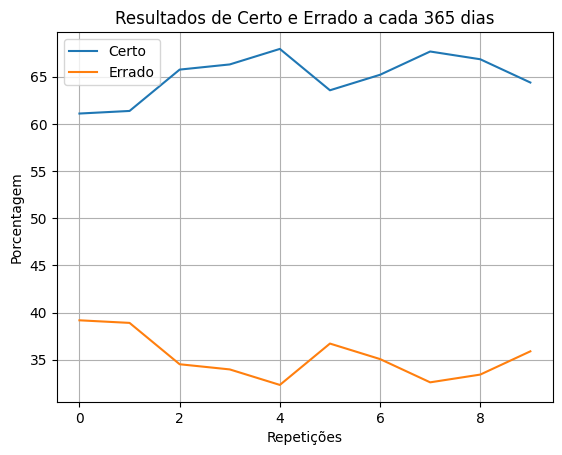

Média de Certo: 65.01369863013699
Média de Errado: 35.26027397260274
Desvio Padrão de Certo: 2.4129298709933296
Desvio Padrão de Errado: 2.4129298709933327


In [ ]:
# Crie um DataFrame do Pandas com os resultados
df = pd.DataFrame({'Certo': resultados_certo, 'Errado': resultados_errado})

# Calcule as métricas
media_certo = df['Certo'].mean()
media_errado = df['Errado'].mean()
desvio_padrao_certo = df['Certo'].std()
desvio_padrao_errado = df['Errado'].std()

# Plote gráficos
df.plot(title='Resultados de Certo e Errado a cada ' + str(dias_por_teste) + ' dias', ylabel='Porcentagem', xlabel='Repetições', grid=True)
plt.show()

# Exiba as métricas calculadas
print("Média de Certo:", media_certo)
print("Média de Errado:", media_errado)
print("Desvio Padrão de Certo:", desvio_padrao_certo)
print("Desvio Padrão de Errado:", desvio_padrao_errado)

### Gráfico de Barras

O gráfico de barras é uma escolha eficaz quando queremos comparar a média de acertos e erros entre diferentes repetições de nossa simulação. Isso pode ajudar a identificar variações significativas entre as repetições e entender se o desempenho do modelo varia consideravelmente em diferentes cenários.

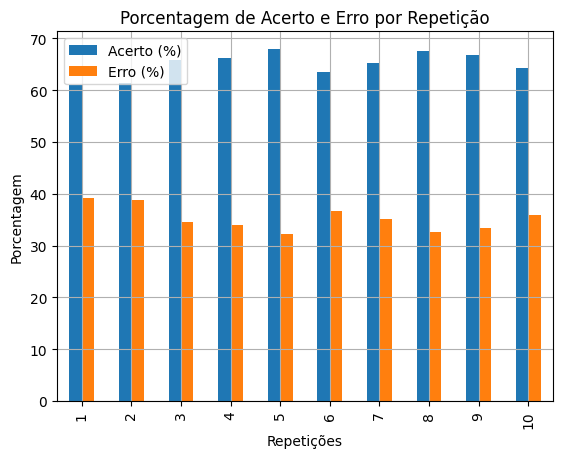

In [ ]:
# Dados fictícios de exemplo
repeticoes = range(1, num_repeticoes + 1)  # Números de repetições
porcentagem_acerto = resultados_certo  # Substitua com seus dados reais
porcentagem_erro = resultados_errado  # Substitua com seus dados reais

# Crie um DataFrame para os dados
data = pd.DataFrame({'Repetições': repeticoes, 'Acerto (%)': porcentagem_acerto, 'Erro (%)': porcentagem_erro})

# Plote o gráfico de barras
data.plot(x='Repetições', kind='bar', title='Porcentagem de Acerto e Erro por Repetição', ylabel='Porcentagem', grid=True)
plt.show()


### Gráfico de Dispersão

O gráfico de dispersão se torna relevante quando desejamos investigar a relação entre a porcentagem de acerto e erro em cada repetição. Em um contexto de simulação de modelo de classificação, ele pode revelar se existe uma correlação entre o desempenho do modelo em acertos e erros.

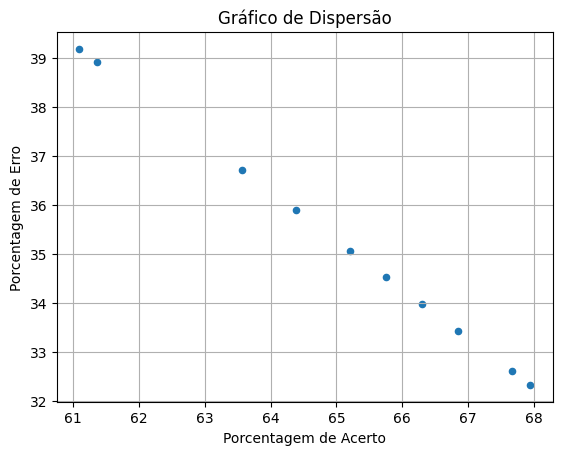

In [ ]:
# Dados fictícios de exemplo
porcentagem_acerto = resultados_certo  # Substitua com seus dados reais
porcentagem_erro = resultados_errado  # Substitua com seus dados reais

# Crie um DataFrame para os dados
data = pd.DataFrame({'Acerto (%)': porcentagem_acerto, 'Erro (%)': porcentagem_erro})

# Plote o gráfico de dispersão
data.plot(x='Acerto (%)', y='Erro (%)', kind='scatter', title='Gráfico de Dispersão', grid=True)
plt.xlabel('Porcentagem de Acerto')
plt.ylabel('Porcentagem de Erro')
plt.show()

## Novo

In [ ]:
# Os estados possíveis
estados = ["Certo", "Errado"]

# Possíveis sequências de eventos
transicoes = [["CC", "CE"], ["EC", "EE"]]

# Matriz de transição (probabilidades de transição)
matriz_transicao_atual = [[0.95, 0.05],  # Probabilidades de transição de Funcionando (CC, CE)
                    [0.95, 0.05]]  # Probabilidades de transição de Parado (EC, EE)

In [ ]:
# Função para prever o estado futuro do sistema
def prever_estado_futuro(dias):

    # Escolhe o estado inicial
    estado_atual = "Certo"
    print("Estado inicial: " + estado_atual)

    # Lista para armazenar a sequência de estados
    lista_estados = [estado_atual]
    probabilidade_total = 1.0

    for _ in range(dias):
        if estado_atual == "Certo":
            transicao = np.random.choice(transicoes[0], replace=True, p=matriz_transicao_atual[0])
            if transicao == "CC":
                probabilidade_total *= matriz_transicao_atual[0][0]
                estado_atual = "Certo"
                lista_estados.append("Certo")
            else:
                probabilidade_total *= matriz_transicao_atual[0][1]
                estado_atual = "Errado"
                lista_estados.append("Errado")
        else:  # Estado atual é "Parado"
            transicao = np.random.choice(transicoes[1], replace=True, p=matriz_transicao_atual[1])
            if transicao == "EE":
                probabilidade_total *= matriz_transicao_atual[1][1]
                estado_atual = "Errado"
                lista_estados.append("Errado")
            else:
                probabilidade_total *= matriz_transicao_atual[1][0]
                estado_atual = "Certo"
                lista_estados.append("Certo")


    count_certo = 0
    count_errado = 0

    for x in lista_estados:
      if(x == "Certo"):
        count_certo += 1
      else:
        count_errado += 1

    porcentagem_de_acerto = str((count_certo/dias)*100)
    porcentagem_de_errado = str((count_errado/dias)*100)


    print("Quantidade de classificações corretas: " + porcentagem_de_acerto + "%")
    print("Quantidade de classificações erradas: " + porcentagem_de_errado + "%")

    return float(porcentagem_de_acerto), float(porcentagem_de_errado)

In [ ]:
# Previsão do estado futuro para 100 dias
prever_estado_futuro(100)

Estado inicial: Certo
Quantidade de classificações corretas: 91.0%
Quantidade de classificações erradas: 10.0%


(91.0, 10.0)

In [ ]:
# Número de repetições (para obter estatísticas)
num_repeticoes_atual = 10
dias_por_teste_atual = 365

# Armazene os resultados em listas
resultados_certo_atual = []
resultados_errado_atual = []

for _ in range(num_repeticoes):
    # Execute a função prever_estado_futuro
    acerto, erro = prever_estado_futuro(dias_por_teste)
    resultados_certo_atual.append(acerto)
    resultados_errado_atual.append(erro)

Estado inicial: Certo
Quantidade de classificações corretas: 93.97260273972603%
Quantidade de classificações erradas: 6.301369863013699%
Estado inicial: Certo
Quantidade de classificações corretas: 95.61643835616438%
Quantidade de classificações erradas: 4.657534246575342%
Estado inicial: Certo
Quantidade de classificações corretas: 96.43835616438356%
Quantidade de classificações erradas: 3.8356164383561646%
Estado inicial: Certo
Quantidade de classificações corretas: 93.42465753424658%
Quantidade de classificações erradas: 6.8493150684931505%
Estado inicial: Certo
Quantidade de classificações corretas: 95.61643835616438%
Quantidade de classificações erradas: 4.657534246575342%
Estado inicial: Certo
Quantidade de classificações corretas: 94.24657534246576%
Quantidade de classificações erradas: 6.027397260273973%
Estado inicial: Certo
Quantidade de classificações corretas: 94.79452054794521%
Quantidade de classificações erradas: 5.47945205479452%
Estado inicial: Certo
Quantidade de clas

### Gráfico de linha

O gráfico de linha é uma ferramenta essencial quando estamos simulando o comportamento de um modelo de classificação. Ele nos permite visualizar a evolução das porcentagens de acerto e erro ao longo das repetições. Ao traçar essas linhas, podemos identificar tendências e padrões que se desenvolvem ao longo do tempo.  O gráfico de linha é particularmente útil para acompanhamento a longo prazo e para identificar mudanças nas tendências de acertos e erros.

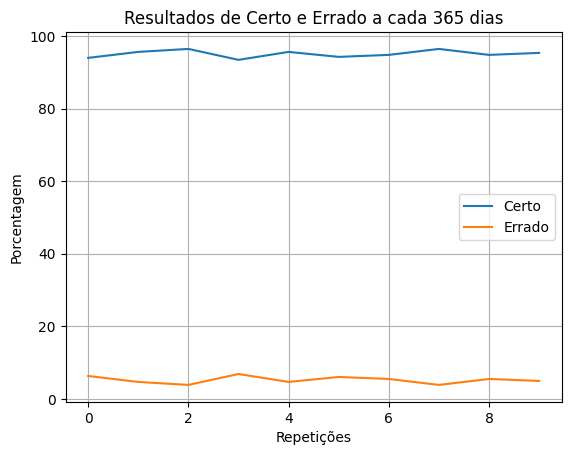

Média de Certo: 95.06849315068493
Média de Errado: 5.205479452054795
Desvio Padrão de Certo: 1.0087087686928988
Desvio Padrão de Errado: 1.0087087686929004


In [ ]:
# Crie um DataFrame do Pandas com os resultados
df = pd.DataFrame({'Certo': resultados_certo_atual, 'Errado': resultados_errado_atual})

# Calcule as métricas
media_certo = df['Certo'].mean()
media_errado = df['Errado'].mean()
desvio_padrao_certo = df['Certo'].std()
desvio_padrao_errado = df['Errado'].std()

# Plote gráficos
df.plot(title='Resultados de Certo e Errado a cada ' + str(dias_por_teste_atual) + ' dias', ylabel='Porcentagem', xlabel='Repetições', grid=True)
plt.show()

# Exiba as métricas calculadas
print("Média de Certo:", media_certo)
print("Média de Errado:", media_errado)
print("Desvio Padrão de Certo:", desvio_padrao_certo)
print("Desvio Padrão de Errado:", desvio_padrao_errado)

### Gráfico de Barras

O gráfico de barras é uma escolha eficaz quando queremos comparar a média de acertos e erros entre diferentes repetições de nossa simulação. Isso pode ajudar a identificar variações significativas entre as repetições e entender se o desempenho do modelo varia consideravelmente em diferentes cenários.

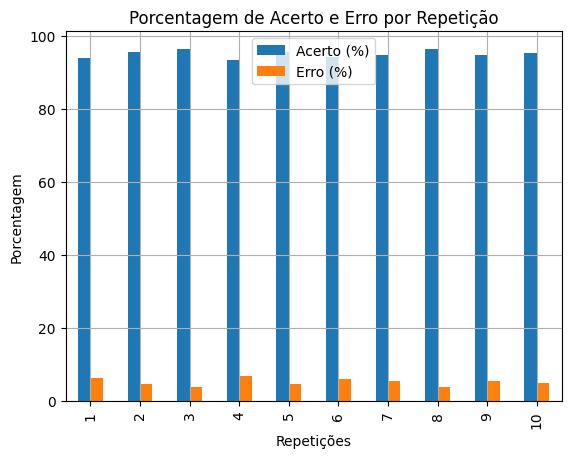

In [ ]:
# Dados fictícios de exemplo
repeticoes = range(1, num_repeticoes_atual + 1)  # Números de repetições
porcentagem_acerto = resultados_certo_atual  # Substitua com seus dados reais
porcentagem_erro = resultados_errado_atual  # Substitua com seus dados reais

# Crie um DataFrame para os dados
data = pd.DataFrame({'Repetições': repeticoes, 'Acerto (%)': porcentagem_acerto, 'Erro (%)': porcentagem_erro})

# Plote o gráfico de barras
data.plot(x='Repetições', kind='bar', title='Porcentagem de Acerto e Erro por Repetição', ylabel='Porcentagem', grid=True)
plt.show()


### Gráfico de Dispersão

O gráfico de dispersão se torna relevante quando desejamos investigar a relação entre a porcentagem de acerto e erro em cada repetição. Em um contexto de simulação de modelo de classificação, ele pode revelar se existe uma correlação entre o desempenho do modelo em acertos e erros.

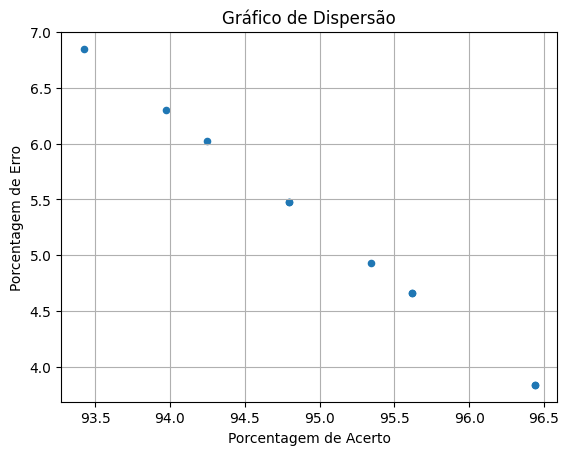

In [ ]:
# Dados fictícios de exemplo
porcentagem_acerto = resultados_certo_atual  # Substitua com seus dados reais
porcentagem_erro = resultados_errado_atual  # Substitua com seus dados reais

# Crie um DataFrame para os dados
data = pd.DataFrame({'Acerto (%)': porcentagem_acerto, 'Erro (%)': porcentagem_erro})

# Plote o gráfico de dispersão
data.plot(x='Acerto (%)', y='Erro (%)', kind='scatter', title='Gráfico de Dispersão', grid=True)
plt.xlabel('Porcentagem de Acerto')
plt.ylabel('Porcentagem de Erro')
plt.show()